In [1]:
import pandas as pd
import numpy as np
from CustomImputers import *


In [2]:
df=pd.read_csv('train_cleaned_outcome_imputed.csv')

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error

predictors = df.columns.tolist()
if 'id' in predictors:
    predictors.remove('id')
if 'sii' in predictors:
    predictors.remove('sii')
predictors = [x for x in predictors if 'PCIAT' not in x]
predictors = [x for x in predictors if 'Season' not in x]


In [4]:
from sklearn.model_selection import KFold


In [5]:
# A couple different sets of predictor variables to try out.
predictors1=['Basic_Demos-Age',
 'Basic_Demos-Sex',
 'PreInt_EduHx-computerinternet_hoursday']
predictors2=['Basic_Demos-Age',
 'Basic_Demos-Sex',
 'CGAS-CGAS_Score',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP',
 'PAQ_Total',
 'PAQ_Zone']

In [6]:
#Running some basic, terrible, linear models for PCIAT

mlr1 = LinearRegression()
mlr2 = LinearRegression()
mlr3 = LinearRegression()

## Make a KFold object
## remember to set a random_state and set shuffle = True
num_splits = 5
num_models = 3
kfold = KFold(num_splits,
              random_state = 216,
              shuffle=True)

## This array will hold the mse for each model and split
mses = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

mouse = Custom_MICE_Imputer()
## loop through the kfold here
for train_index, test_index in kfold.split(df):
    print('split number:', i)
    ## Define training and test sets. Reset index to avoid problems with imputation. 
    # Train the imputation and then transform both sets by imputation, then zone.  
    df_tt = df.iloc[train_index]
    df_tt.reset_index(inplace=True)
    mouse.fit(df_tt)
    df_tt_imputed = mouse.transform(df_tt)
    df_tt_imp_zoned=zone_encoder(df_tt_imputed)
    
    df_ho = df.iloc[test_index] 
    df_ho.reset_index(inplace=True) 
    df_ho_imputed = mouse.transform(df_ho)
    df_ho_imp_zoned=zone_encoder(df_ho_imputed)
    
    
#Three different linear regression models, with different choices for predictor variables.

    mlr1.fit(df_tt_imp_zoned[predictors1], df_tt_imp_zoned[['PCIAT-PCIAT_Total']])
    mlr2.fit(df_tt_imp_zoned[predictors2], df_tt_imp_zoned[['PCIAT-PCIAT_Total']])
    mlr3.fit(df_tt_imp_zoned[predictors], df_tt_imp_zoned[['PCIAT-PCIAT_Total']])

    ## Use both models to generate predictions on the holdout set
    mlr1_preds = mlr1.predict(df_ho_imp_zoned[predictors1])
    mlr2_preds = mlr2.predict(df_ho_imp_zoned[predictors2])
    mlr3_preds = mlr3.predict(df_ho_imp_zoned[predictors])

    ## Record the rmses
    mses[0,i] = root_mean_squared_error(df_ho_imp_zoned['PCIAT-PCIAT_Total'], mlr1_preds)
    mses[1,i] = root_mean_squared_error(df_ho_imp_zoned['PCIAT-PCIAT_Total'], mlr2_preds)
    mses[2,i] = root_mean_squared_error(df_ho_imp_zoned['PCIAT-PCIAT_Total'], mlr3_preds)
    i+=1

split number: 0
split number: 1
split number: 2
split number: 3
split number: 4


In [7]:
#Mean square error for these models.
print(mses)

[[17.49816051 18.65467262 18.23419342 18.08669759 17.08465246]
 [18.17688904 19.04104528 18.46053919 18.76753561 17.29702503]
 [16.71113268 17.89063328 17.76023329 17.86911547 16.79566125]]


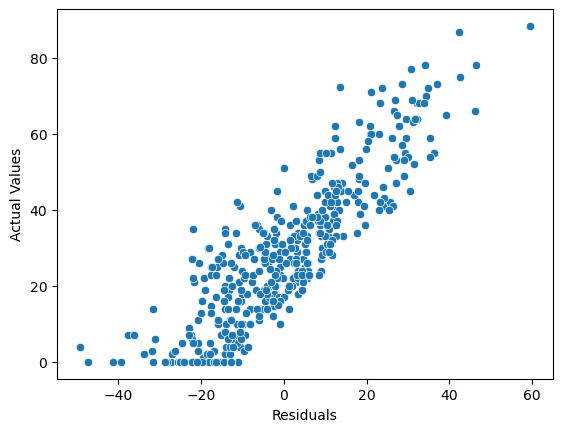

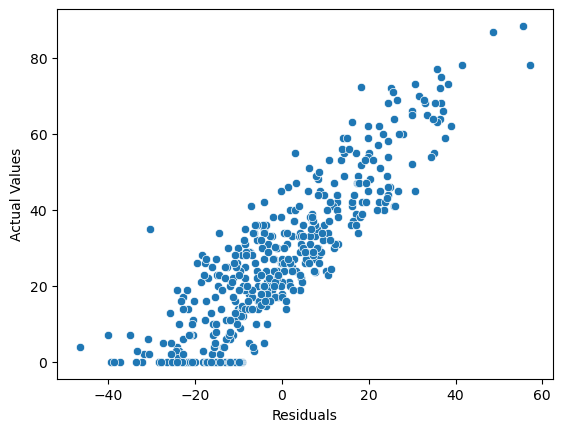

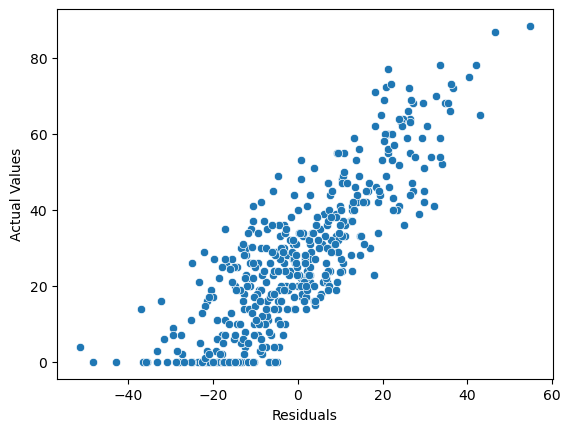

In [8]:
#Some plots of the values vs residuals.
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=(df_ho_imp_zoned['PCIAT-PCIAT_Total']-mlr1_preds.ravel()), y=df_ho_imp_zoned['PCIAT-PCIAT_Total'])
plt.xlabel('Residuals')
plt.ylabel('Actual Values')

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=(df_ho_imp_zoned['PCIAT-PCIAT_Total']-mlr2_preds.ravel()), y=df_ho_imp_zoned['PCIAT-PCIAT_Total'])
plt.xlabel('Residuals')
plt.ylabel('Actual Values')

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=(df_ho_imp_zoned['PCIAT-PCIAT_Total']-mlr3_preds.ravel()), y=df_ho_imp_zoned['PCIAT-PCIAT_Total'])
plt.xlabel('Residuals')
plt.ylabel('Actual Values')

plt.show()

In [ ]:
#Running some basic, terrible, linear models for sii

mlr1 = LinearRegression()
mlr2 = LinearRegression()
mlr3 = LinearRegression()

## Make a KFold object
## remember to set a random_state and set shuffle = True
num_splits = 5
num_models = 3
kfold = KFold(num_splits,
              random_state = 216,
              shuffle=True)

## This array will hold the mse for each model and split
mses = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

mouse = Custom_MICE_Imputer()
## loop through the kfold here
for train_index, test_index in kfold.split(df):
    print('split number:', i)
    ## Define training and test sets. Reset index to avoid problems with imputation. 
    # Train the imputation and then transform both sets by imputation, then zone.  
    df_tt = df.iloc[train_index]
    df_tt.reset_index(inplace=True)
    mouse.fit(df_tt)
    df_tt_imputed = mouse.transform(df_tt)
    df_tt_imp_zoned=zone_encoder(df_tt_imputed)
    
    df_ho = df.iloc[test_index] 
    df_ho.reset_index(inplace=True) 
    df_ho_imputed = mouse.transform(df_ho)
    df_ho_imp_zoned=zone_encoder(df_ho_imputed)
    
    
#Three different linear regression models, with different choices for predictor variables.

    mlr1.fit(df_tt_imp_zoned[predictors1], df_tt_imp_zoned[['sii']])
    mlr2.fit(df_tt_imp_zoned[predictors2], df_tt_imp_zoned[['sii']])
    mlr3.fit(df_tt_imp_zoned[predictors], df_tt_imp_zoned[['sii']])

    ## Use both models to generate predictions on the holdout set
    mlr1_preds = mlr1.predict(df_ho_imp_zoned[predictors1])
    mlr2_preds = mlr2.predict(df_ho_imp_zoned[predictors2])
    mlr3_preds = mlr3.predict(df_ho_imp_zoned[predictors])

    ## Record the rmses
    mses[0,i] = root_mean_squared_error(df_ho_imp_zoned['sii'], mlr1_preds)
    mses[1,i] = root_mean_squared_error(df_ho_imp_zoned['sii'], mlr2_preds)
    mses[2,i] = root_mean_squared_error(df_ho_imp_zoned['sii'], mlr3_preds)
    i+=1
    

split number: 0
split number: 1
split number: 2
split number: 3
split number: 4


In [10]:
print(mses)

[[0.69997107 0.74026143 0.71758395 0.68709803 0.670517  ]
 [0.72319427 0.757773   0.72404524 0.70943617 0.67679956]
 [0.66380845 0.7228492  0.69369982 0.68221059 0.66034475]]


In [ ]:
#Trying logistic regression to predict 3's for sii. 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

logr1 = LogisticRegression()
logr2 = LogisticRegression()
logr3 = LogisticRegression()

## Make a KFold object
## remember to set a random_state and set shuffle = True
num_splits = 5
num_models = 3
kfold = KFold(num_splits,
              random_state = 216,
              shuffle=True)


scaler = StandardScaler()


## This array will hold the mse for each model and split
accuracy = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

mouse = Custom_MICE_Imputer()
## loop through the kfold here
for train_index, test_index in kfold.split(df):
    print('split number:', i)
    ## Define training and test sets. Reset index to avoid problems with imputation. 
    # Train the imputation and then transform both sets by imputation, then zone.  
    df_tt = df.iloc[train_index]
    df_tt.reset_index(inplace=True)
    mouse.fit(df_tt)
    df_tt_imputed = mouse.transform(df_tt)
    df_tt_imp_zoned=zone_encoder(df_tt_imputed)
    df_tt_scaled=df_tt_imp_zoned
    df_tt_scaled[predictors]=scaler.fit_transform(df_tt_imp_zoned[predictors])
    df_tt_scaled['sii_3'] = (df_tt_imp_zoned['sii'] > 2).astype(int)
    
    df_ho = df.iloc[test_index] 
    df_ho.reset_index(inplace=True) 
    df_ho_imputed = mouse.transform(df_ho)
    df_ho_imp_zoned=zone_encoder(df_ho_imputed)
    df_ho_scaled=df_ho_imp_zoned
    df_ho_scaled[predictors]=scaler.transform(df_ho_imp_zoned[predictors])
    df_ho_scaled['sii_3'] = (df_ho_imp_zoned['sii'] > 2).astype(int)
    
    
#Three different linear regression models, with different choices for predictor variables.

    logr1.fit(df_tt_scaled[predictors1], df_tt_scaled[['sii_3']])
    logr2.fit(df_tt_scaled[predictors2], df_tt_scaled[['sii_3']])
    logr3.fit(df_tt_scaled[predictors], df_tt_scaled[['sii_3']])

    ## Use both models to generate predictions on the holdout set
    logr1_preds = logr1.predict(df_ho_scaled[predictors1])
    logr2_preds = logr2.predict(df_ho_scaled[predictors2])
    logr3_preds = logr3.predict(df_ho_scaled[predictors])

    ## Record the rmses
    accuracy[0,i] = accuracy_score(df_ho_imp_zoned['sii_3'], logr1_preds)
    accuracy[1,i] = accuracy_score(df_ho_imp_zoned['sii_3'], logr2_preds)
    accuracy[2,i] = accuracy_score(df_ho_imp_zoned['sii_3'], logr3_preds)

    i+=1

split number: 0


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0 6
split number: 1


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1 7
split number: 2


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0 10
split number: 3


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1 7
split number: 4
2 2


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print(accuracy)

[[0.98633257 0.98405467 0.97722096 0.98405467 0.99543379]
 [0.98405467 0.98405467 0.97722096 0.98177677 0.99543379]
 [0.98633257 0.98177677 0.97722096 0.98177677 0.99086758]]


In [46]:
#Trying logistic regression to predict 0's for sii. 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

logr1 = LogisticRegression()
logr2 = LogisticRegression()
logr3 = LogisticRegression()

## Make a KFold object
## remember to set a random_state and set shuffle = True
num_splits = 5
num_models = 3
kfold = KFold(num_splits,
              random_state = 216,
              shuffle=True)


scaler = StandardScaler()


## This array will hold the mse for each model and split
mses = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

mouse = Custom_MICE_Imputer()
## loop through the kfold here
for train_index, test_index in kfold.split(df):
    print('split number:', i)
    ## Define training and test sets. Reset index to avoid problems with imputation. 
    # Train the imputation and then transform both sets by imputation, then zone.  
    df_tt = df.iloc[train_index]
    df_tt.reset_index(inplace=True)
    mouse.fit(df_tt)
    df_tt_imputed = mouse.transform(df_tt)
    df_tt_imp_zoned=zone_encoder(df_tt_imputed)
    df_tt_scaled=df_tt_imp_zoned
    df_tt_scaled[predictors]=scaler.fit_transform(df_tt_imp_zoned[predictors])
    df_tt_scaled['sii_1'] = (df_tt_imp_zoned['sii'] <1).astype(int)
    
    df_ho = df.iloc[test_index] 
    df_ho.reset_index(inplace=True) 
    df_ho_imputed = mouse.transform(df_ho)
    df_ho_imp_zoned=zone_encoder(df_ho_imputed)
    df_ho_scaled=df_ho_imp_zoned
    df_ho_scaled[predictors]=scaler.transform(df_ho_imp_zoned[predictors])
    df_ho_scaled['sii_1'] = (df_ho_imp_zoned['sii'] <1).astype(int)
    
    
#Three different linear regression models, with different choices for predictor variables.

    logr1.fit(df_tt_scaled[predictors1], df_tt_scaled[['sii_1']])
    logr2.fit(df_tt_scaled[predictors2], df_tt_scaled[['sii_1']])
    logr3.fit(df_tt_scaled[predictors], df_tt_scaled[['sii_1']])

    ## Use both models to generate predictions on the holdout set
    logr1_preds = logr1.predict(df_ho_scaled[predictors1])
    logr2_preds = logr2.predict(df_ho_scaled[predictors2])
    logr3_preds = logr3.predict(df_ho_scaled[predictors])

    ## Record the rmses
    accuracy[0,i] = accuracy_score(df_ho_imp_zoned['sii_1'], logr1_preds)
    accuracy[1,i] = accuracy_score(df_ho_imp_zoned['sii_1'], logr2_preds)
    accuracy[2,i] = accuracy_score(df_ho_imp_zoned['sii_1'], logr3_preds)


    i+=1

split number: 0


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


split number: 1


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


split number: 2


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


split number: 3


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


split number: 4


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
#Model predictions vs actual for 1's.
print(accuracy)

[[0.6833713  0.6833713  0.66287016 0.69248292 0.69178082]
 [0.67881549 0.67881549 0.64920273 0.69476082 0.6826484 ]
 [0.73120729 0.70387244 0.67881549 0.69476082 0.68949772]]
